# Objectives of EDA

To help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bangalore on the basis of food. This dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

# Data Definition

**url:** Contains the url of the restaurant in the zomato website

**address:** Contains the address of the restaurant in Bangalore

**name:** Contains the name of the restaurant

**online_order**: Whether online ordering is available in the restaurant or not

**book_table:** Table booking option available or not

**rate:** Contains the overall rating of the restaurant out of 5

**votes:** Contains total number of rating for the restaurant as of the above mentioned date

**phone:** Contains the phone number of the restaurant

**location:** Contains the neighborhood in which the restaurant is located

**rest_type:** Restaurant type

**dish_liked:** Dishes people liked in the restaurant

**cuisines:** Food styles, separated by comma

**approx_cost(for two people):** Contains the approximate cost for meal for two people

**reviews_list:** List of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer

**menu_item:** Contains list of menus available in the restaurant

**listed_in(type):** Type of service

<a id='import_lib'></a>
# 1. Importing Important Libraries

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import plotly.offline as py
from plotly.offline import iplot

These are the libraries which I am using for EDA and Visualization:-

**Pandas:** A software library written for the Python programming language for data manipulation and analysis.

**Numpy:** A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Matplotlib:** A plotting library for the Python programming language and its numerical mathematics extension NumPy.

**Seaborn:** A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Scikit-learn (sklearn):** Emphasizes various regression, classification and clustering algorithms

**Plotly:** Used to create interactive visualizations and plots

<a id='load_data'></a>
# 2. Loading Dataset

In [2]:
# Loading dataset

df = pd.read_csv("zomato (Bangalore).csv")

In [3]:
# Displaying the first 5 rows rows in the dataset

df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
df.shape

(51717, 17)

**Observation:**

We can see that there are 51717 rows and 17 columns.

In [5]:
# Displays the names of the columns in a dataset

df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
# Displays information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Observation:**

Here we can see only one feature which has **int** datatype and remaining all features have **object** as their datatype.

We can also see that there are few features with some null values like **'rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines'** and **'approx_cost(for two people)'**

In [7]:
# Displays the count of null values in a dataset

df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<AxesSubplot:>

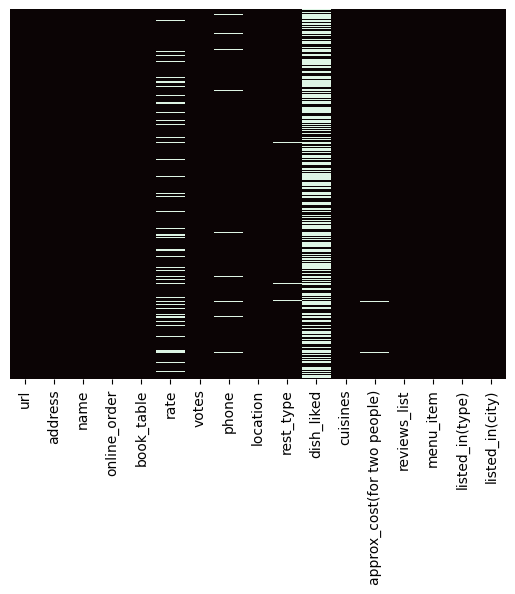

In [8]:
# Plotting missing data

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'mako')

<a id='rename'></a>
# 5.3 Renaming columns

In [9]:
df = df.rename(columns = {'approx_cost(for two people)':'Cost_for_two','listed_in(type)':'Type_of_service', 'listed_in(city)': 'City'})
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines Cost_for_two  \
0  North Indian, Mughlai, Chinese          800   
1     Chinese, North Indian, Thai          800   
2          Cafe, Mexican, Italian          800   
3      South Indian, North Indian          300   
4        North Indian, Rajasthani          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  Type_of_service          City  
0          Buffet  Banashankari  
1          Buffet  Banashankari  
2          Buffet  Banashankari  
3          Buffet  Banashankari  
4          Buffet  Banashankari

<a id='observation'></a>
# 3. Observation of the dataset

Here in this dataset we can see the columns **'url', 'address', 'phone', 'dish_liked', 'reviews_list'** and **'menu_item'**.

The above columns are not useful for EDA. So we can drop them.

In [10]:
# Used to drop columns in a dataset

df = df.drop(['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], axis=1)

In [11]:
# Displaying the modified dataset

df.head()

name online_order book_table   rate  votes      location  \
0                  Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1         Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2        San Churro Cafe          Yes         No  3.8/5    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88  Banashankari   
4          Grand Village           No         No  3.8/5    166  Basavanagudi   

             rest_type                        cuisines Cost_for_two  \
0        Casual Dining  North Indian, Mughlai, Chinese          800   
1        Casual Dining     Chinese, North Indian, Thai          800   
2  Cafe, Casual Dining          Cafe, Mexican, Italian          800   
3          Quick Bites      South Indian, North Indian          300   
4        Casual Dining        North Indian, Rajasthani          600   

  Type_of_service          City  
0          Buffet  Banashankari  
1          Buffet  Banashankari  
2          Buffet  Banashankari  
3          Buffet  Banashankari  
4          Buffet  Banashankari

In [12]:
# Displaying shape of the modified dataset

df.shape

(51717, 11)

In [13]:
# Displaying column names of the modified dataset

df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost_for_two', 'Type_of_service', 'City'],
      dtype='object')

<a id='duplicate_value'></a>
# 4. Removing duplicate values from the dataset

In [14]:
# Displaying all the duplicate values

df[df.duplicated()]

name online_order book_table    rate  votes  \
596                 My Tea House          Yes        Yes     NEW      0   
2235                  Shiv Sagar           No         No   3.6/5     10   
3763       The Fisherman's Wharf          Yes        Yes   4.4/5   4099   
4339               Biryani Treat           No         No     NaN      0   
4949                   OPUS Club           No        Yes   4.4/5   1496   
...                          ...          ...        ...     ...    ...   
49193  Sri Ganesh Juice Junction          Yes         No  3.5 /5      6   
49432              Biryani Treat           No         No     NaN      0   
50379             House Of Candy          Yes         No     NaN      0   
50405             House Of Candy          Yes         No     NaN      0   
50904           Nawab Di Biryani          Yes         No     NEW      0   

                location           rest_type  \
596         Banashankari       Casual Dining   
2235   Bannerghatta Road          Food Court   
3763       Sarjapur Road  Casual Dining, Bar   
4339           Bellandur         Quick Bites   
4949       Sarjapur Road                 Pub   
...                  ...                 ...   
49193          Bellandur       Beverage Shop   
49432          Bellandur         Quick Bites   
50379         Whitefield       Confectionery   
50405         Whitefield       Confectionery   
50904         Whitefield  Takeaway, Delivery   

                                              cuisines Cost_for_two  \
596              Continental, Asian, North Indian, Tea          500   
2235                           South Indian, Beverages          400   
3763   Seafood, Goan, North Indian, Continental, Asian        1,400   
4339                                           Biryani          400   
4949       Continental, Italian, North Indian, Mexican        1,900   
...                                                ...          ...   
49193                                Juices, Fast Food          200   
49432                                          Biryani          400   
50379                                         Desserts          200   
50405                                         Desserts          200   
50904                                 Biryani, Mughlai          400   

          Type_of_service               City  
596              Dine-out       Banashankari  
2235             Dine-out  Bannerghatta Road  
3763               Buffet          Bellandur  
4339             Delivery          Bellandur  
4949   Drinks & nightlife          Bellandur  
...                   ...                ...  
49193            Delivery      Sarjapur Road  
49432            Delivery      Sarjapur Road  
50379            Delivery         Whitefield  
50405            Delivery         Whitefield  
50904            Delivery         Whitefield  

[108 rows x 11 columns]

**Observation:**

Here we can see that there are **108 rows** which have duplicate data.

Duplicate data can affect the model and may lead to wrong predictions. In order to avoid this we will drop these duplicate rows.

In [15]:
# Displaying shape of the dataset before dropping duplicate rows

print("Total no. rows and columns before dropping duplicate rows:", df.shape)


# Dropping duplicate rows

df.drop_duplicates(inplace = True)


# Displaying shape of the dataset after dropping duplicate rows

print("Total no. rows and columns after dropping duplicate rows:", df.shape)

Total no. rows and columns before dropping duplicate rows: (51717, 11)
Total no. rows and columns after dropping duplicate rows: (51609, 11)


<a id='cleaning_data'></a>
# 5. Cleaning Data

<a id='rate_column'></a>
## 5.1 `Rate` column

In [16]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**Observation:**

Here we can see the ratings as **'4.3/5', 'NEW', '2.9/5', '3.5/5', nan**

1. Rating written as **4.3/5** might cause issues while doing calculations. In order to avoid that we need to change the ratings just to **4.3** by removing **/5**.

2. We can observe unique elements **'NEW'** and **'-'** in the column.

3. We will now write a function to change those values to **'nan'** and also transform all the ratings into float.

<a id='rate_column_remove'></a>
### 5.1.1 Removing 'NEW', '-', and '/5' from `rate` column

#### Checking total no. of newly opened restaurants

In [17]:
df[df['rate'] == 'NEW']

name online_order book_table rate  votes  \
72                 Spicy Tandoor           No         No  NEW      0   
75         Om Sri Vinayaka Chats           No         No  NEW      0   
110          Hari Super Sandwich           No         No  NEW      0   
130         Roll Magic Fast Food           No         No  NEW      0   
131    Foodlieious Multi Cuisine           No         No  NEW      0   
...                          ...          ...        ...  ...    ...   
51585            Wow Tiffin Food           No         No  NEW      0   
51586                Quick Bites          Yes         No  NEW      0   
51603                 Shiv sagar          Yes         No  NEW      0   
51604           Nawab Di Biryani           No         No  NEW      0   
51605           Bong Connections           No         No  NEW      0   

           location                rest_type  \
72     Banashankari              Quick Bites   
75     Banashankari       Takeaway, Delivery   
110    Banashankari       Takeaway, Delivery   
130    Banashankari       Takeaway, Delivery   
131    Banashankari              Quick Bites   
...             ...                      ...   
51585    Whitefield              Quick Bites   
51586    Whitefield              Quick Bites   
51603    Whitefield  Quick Bites, Food Court   
51604    Whitefield       Takeaway, Delivery   
51605    Whitefield              Quick Bites   

                                  cuisines Cost_for_two Type_of_service  \
72                            North Indian          150        Delivery   
75                  Street Food, Fast Food          500        Delivery   
110             Sandwich, Pizza, Beverages          200        Delivery   
130                Biryani, Rolls, Chinese          200        Delivery   
131                           North Indian          100        Delivery   
...                                    ...          ...             ...   
51585                         North Indian          200        Dine-out   
51586                              Chinese          200        Dine-out   
51603  South Indian, Chinese, North Indian          250        Dine-out   
51604                     Biryani, Mughlai          400        Dine-out   
51605                Chinese, North Indian          300        Dine-out   

               City  
72     Banashankari  
75     Banashankari  
110    Banashankari  
130    Banashankari  
131    Banashankari  
...             ...  
51585    Whitefield  
51586    Whitefield  
51603    Whitefield  
51604    Whitefield  
51605    Whitefield  

[2195 rows x 11 columns]

#### Calculating the percentage of newly opened restaurants compared to the total no. of rows in the dataset

In [18]:
count_NEW = df['rate'].value_counts()['NEW']
print("Count of newly opened restaurants:", count_NEW)
print("Percentage of newly opened restaurants:", np.round((count_NEW*100)/len(df),2), "%")

Count of newly opened restaurants: 2195
Percentage of newly opened restaurants: 4.25 %


#### Checking the percentage of total no. of rows having '-' as their value compared to the total no. of rows in the dataset

In [19]:
count_ = df['rate'].value_counts()['-']
print("Count of rows having '-' as value:", count_)
print("Percentage of rows having '-' as value:", np.round((count_*100)/len(df),2), "%")

Count of rows having '-' as value: 69
Percentage of rows having '-' as value: 0.13 %


#### Creating a function to handle the 'NEW', '-' values and also to remove '/5' from the `rate` column

In [20]:
def handle_rate(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

#### Calling the above function

In [21]:
df['rate'] = df['rate'].apply(handle_rate)
df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

#### Checking the total count of 'Null' values in `rate` column

In [22]:
df.rate.isnull().sum()

10019

#### Replacing 'Null' values in `rate` column with its mean

In [23]:
df['rate'].fillna(df['rate'].mean(), inplace = True)

#### Checking the total count of 'Null' values in `rate` column after replacing with mean

In [24]:
df['rate'].isnull().sum()

0

#### Checking information of the dataset after making the above changes

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   location         51588 non-null  object 
 6   rest_type        51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   Cost_for_two     51265 non-null  object 
 9   Type_of_service  51609 non-null  object 
 10  City             51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


<a id='drop_null'></a>
## 5.2 Dropping Null values from other columns

#### Checking count of null values before dropping them

In [26]:
df.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location            21
rest_type          227
cuisines            45
Cost_for_two       344
Type_of_service      0
City                 0
dtype: int64

**Observation:**

Here we can see that there some 'Null' values in the columns **'location', 'rest_type', 'cuisines'** and **'approx_cost(for two people)'**. Since the count of 'Null' values is insignificant compared to the total no. of rows in the dataset we can drop these rows.

#### Dropping null values

In [27]:
df.dropna(inplace = True)

#### Checking count of null values after dropping them

In [28]:
df.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
Cost_for_two       0
Type_of_service    0
City               0
dtype: int64

**Observation:**

Rows having 'Null' values have been deleted.

<a id='chi_sq'></a>
## 5.4 Chi-square test of independence

#### Checking unique values in the `location` column

In [29]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

#### Checking unique values in the `City` column

In [30]:
df.City.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

#### Checking correlation between columns `location` and `City`

**Hypothesis:**

H0: location and City columns are independent

H1: location and City columns are dependent

In [31]:
# Creating a contingency table

contingency_table = pd.crosstab(df.location, df.City)
contingency_table

City                BTM  Banashankari  Bannerghatta Road  Basavanagudi  \
location                                                                 
BTM                1114             0                260            30   
Banashankari          1           484                  0           275   
Banaswadi             0             0                  0             0   
Bannerghatta Road   251             0                751             8   
Basavanagudi          0           177                  0           334   
...                 ...           ...                ...           ...   
West Bangalore        0             0                  0             0   
Whitefield            0             0                  0             0   
Wilson Garden         0             0                  0            22   
Yelahanka             0             0                  0             0   
Yeshwantpur           0             0                  0             0   

City               Bellandur  Brigade Road  Brookefield  Church Street  \
location                                                                 
BTM                        1             2            1              0   
Banashankari               1             1            0              2   
Banaswadi                  0             0            0              0   
Bannerghatta Road          0             1            0              1   
Basavanagudi               0             3            0              1   
...                      ...           ...          ...            ...   
West Bangalore             0             0            0              0   
Whitefield                 3             1          623              1   
Wilson Garden              0            15            0              9   
Yelahanka                  0             0            0              0   
Yeshwantpur                0             0            0              0   

City               Electronic City  Frazer Town  ...  Lavelle Road  MG Road  \
location                                         ...                          
BTM                              0            1  ...             2        2   
Banashankari                     0            1  ...             1        1   
Banaswadi                        0           44  ...             0        0   
Bannerghatta Road                0            0  ...             1        0   
Basavanagudi                     0            0  ...            30        0   
...                            ...          ...  ...           ...      ...   
West Bangalore                   0            0  ...             0        0   
Whitefield                       0            0  ...             1        1   
Wilson Garden                    0            0  ...            22        9   
Yelahanka                        0            0  ...             0        0   
Yeshwantpur                      0            0  ...             0        0   

City               Malleshwaram  Marathahalli  New BEL Road  Old Airport Road  \
location                                                                        
BTM                           0             1             0                 1   
Banashankari                  0             0             0                 0   
Banaswadi                     0             0             0                 0   
Bannerghatta Road             0             0             0                 0   
Basavanagudi                  0             0             0                 0   
...                         ...           ...           ...               ...   
West Bangalore                2             0             0                 0   
Whitefield                    0            91             0                 1   
Wilson Garden                 0             0             0                 0   
Yelahanka                     2             0             3                 0   
Yeshwantpur                  73             0            44               

In [32]:
# Performing the chi-square test

chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [33]:
# Printing the chi-square test statistic and p-value

print("Chi-square test statistic:", chi2)
print("p-value:", p_value)

Chi-square test statistic: 480878.3331075323
p-value: 0.0


**Observation:**

Since we have a high p-value it indicates that the columns are independent of each other.

<a id='location'></a>
## 5.5 `location` column

In [34]:
location = df.location.value_counts()
location

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

**Observation:**

Here we can see that there are many locations with less number of restaurants because of which the unique locations count is going upto **93**. To reduce this no. we will cluster the location types having values less than 300 into a location type called **Others**.

#### Checking the list of locations having value less than 300

In [35]:
location_having_value_less_than_300 = location[location<300]
location_having_value_less_than_300

Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
Vijay Nagar                       78
RT Nagar                          78
S

#### Creating a function to cluster locations having value less than 300

In [36]:
def handle_location(value):
    try:
        if(value in location_having_value_less_than_300):
            return 'Others'
        else:
            return value
    except Exception as e:
        print("Error:", e)

#### Calling the above function

In [37]:
df.location = df.location.apply(handle_location)
df.location.value_counts()

BTM                      5056
Others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

<a id='cost_for_two'></a>
## 5.6 `Cost_for_two` column

In [38]:
df.Cost_for_two.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

**Observation:**

Here we can see this column has values such as **'1,200', '1,050', '2,300'**.

These type of comma separated values restrict the feature from being **int** or **float** datatype. To rectify this we will have to remove the commas from all the values.

#### Creating a function to remove commas

In [39]:
def handle_comma(value):
    value = str(value)
    try:
        if ',' in value:
            value = value.replace(',', '')
            return float(value)
        else:
            return float(value)
    except Exception as e:
        return ("Raise Error", e)

#### Removing comma from `Cost_for_two` column

In [40]:
df['Cost_for_two'] = df['Cost_for_two'].apply(handle_comma)
df.Cost_for_two.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

<a id='rest_type'></a>
## 5.7 `rest_type` column

In [41]:
rest_type = df.rest_type.value_counts(ascending = False)
print(rest_type)

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64


**Observation:**

Here we can see that there are many restaurant types which are less in number because of which the unique restaurant type value is going upto **93**. To reduce this no. we can cluster the restaurant types having values less than 1000 into a new restaurant type called **Others**.

#### Checking the list of restaurant types having value less than 1000

In [42]:
rest_type_less_than_1000 = rest_type[rest_type<1000]
rest_type_less_than_1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

#### Creating a function to cluster restaurant types having value less than 1000

In [43]:
def handle_rest_type(value):
    try:
        if(value in rest_type_less_than_1000):
            return 'Others'
        else:
            return value
    except Exception as e:
        print("Error:", e)

#### Calling the above function

In [44]:
df.rest_type = df.rest_type.apply(handle_rest_type)
df.rest_type.value_counts()

Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

<a id='cuisines'></a>
## 5.8 `cuisines` column

In [45]:
cuisines = df.cuisines.value_counts()
cuisines

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

**Observation:**

Here we can see that there are many cuisines which are less in number because of which the unique cuisines count is going upto **2704**. To reduce this no. we can cluster the cuisines types having values less than 100 into a cuisine type called **Others**.

#### Checking the list of cuisines having value less than 100

In [46]:
cuisines_having_value_less_than_100 = cuisines[cuisines<100]
cuisines_having_value_less_than_100

North Indian, Continental, Chinese          97
Juices                                      94
Fast Food, North Indian                     93
Bengali, North Indian                       93
Beverages, Juices                           90
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: cuisines, Length: 2635, dtype: int64

#### Creating a function to cluster cuisines having value less than 100

In [47]:
def handle_cuisines(value):
    try:
        if(value in cuisines_having_value_less_than_100):
            return 'Others'
        else:
            return value
    except Exception as e:
        print("Error:", e)

#### Calling the above function

In [48]:
df.cuisines = df.cuisines.apply(handle_cuisines)
df.cuisines.value_counts()

Others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

<a id='Type_of_service'></a>
## 5.9 `Type_of_service` column

In [49]:
df.Type_of_service.value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type_of_service, dtype: int64

**Observation:**

Here we can see that there are few unique values for types of services. So we do not make any changes.

<a id='City'></a>
## 5.10 `City` column

In [50]:
df.City.value_counts()

BTM                      3239
Koramangala 7th Block    2901
Koramangala 5th Block    2799
Koramangala 4th Block    2742
Koramangala 6th Block    2588
Jayanagar                2351
JP Nagar                 2072
Indiranagar              1834
Church Street            1785
MG Road                  1780
Brigade Road             1764
HSR                      1727
Lavelle Road             1726
Marathahalli             1629
Bannerghatta Road        1600
Residency Road           1600
Whitefield               1589
Brookefield              1495
Old Airport Road         1380
Kammanahalli             1305
Kalyan Nagar             1285
Basavanagudi             1264
Sarjapur Road            1235
Electronic City          1214
Bellandur                1205
Frazer Town              1179
Malleshwaram             1092
Rajajinagar              1068
Banashankari              859
New BEL Road              735
Name: City, dtype: int64

**Observation:**

Here we can see that there are few unique values for City. So we do not make any changes.

# Summary Statistics

## 1. Numerical variables

In [51]:
# describing the numerical data

df.describe()

rate         votes  Cost_for_two
count  51042.000000  51042.000000  51042.000000
mean       3.701424    284.507700    555.782983
std        0.395197    805.927478    439.293333
min        1.800000      0.000000     40.000000
25%        3.500000      7.000000    300.000000
50%        3.700142     41.000000    400.000000
75%        3.900000    199.000000    700.000000
max        4.900000  16832.000000   6000.000000

**Observations:**

The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum and maximum values, along with the standard deviation.

1. The average rating of a a restaurant is 3.7.
2. The no. of votes for restaurants range between 0 to 16832.
3. The mean cost for two for restaurants is 556 and ranges between 40 to 6000.

## 2. Categorical variables

In [52]:
# Describing the categorical data

df.describe(include = object)

name online_order book_table location    rest_type  \
count             51042        51042      51042    51042        51042   
unique             8723            2          2       42            9   
top     Cafe Coffee Day          Yes         No      BTM  Quick Bites   
freq                 96        30228      44626     5056        19010   

       cuisines Type_of_service   City  
count     51042           51042  51042  
unique       70               7     30  
top      Others        Delivery    BTM  
freq      26159           25579   3239

**Observations:**

The summary statistics for categorical variables can be interpreted as:

*count* - Total number of observations
*unique* - Number of unique classes in a variable
*top* - The most repeated class
*freq* - Frequency of most repeated class

1. The total no. of unique restaurants in the dataset is 51042.
2. Majority of the restaurants have online ordering facility with a frequency of 30228 out of 51042 restuarnts.
3. Majority of the restaurants do not have table booking facility with a frequency of 44626 out of 51042 restuarnts.
4. There are 42 unique locations in which the the restaurants are located.

## Discovering Outliers

#### 1. Bifurcating dataset into two different datasets (numeric and categorical)

In [53]:
# select the numerical features in the dataset using 'select_dtypes()'

df_num = df.select_dtypes(include=np.number)
df_num

rate  votes  Cost_for_two
0      4.100000    775         800.0
1      4.100000    787         800.0
2      3.800000    918         800.0
3      3.700000     88         300.0
4      3.800000    166         600.0
...         ...    ...           ...
51712  3.600000     27        1500.0
51713  3.700142      0         600.0
51714  3.700142      0        2000.0
51715  4.300000    236        2500.0
51716  3.400000     13        1500.0

[51042 rows x 3 columns]

#### 2. Plot boxplot for numerical data

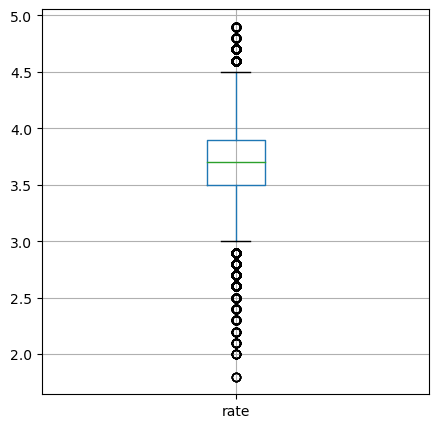

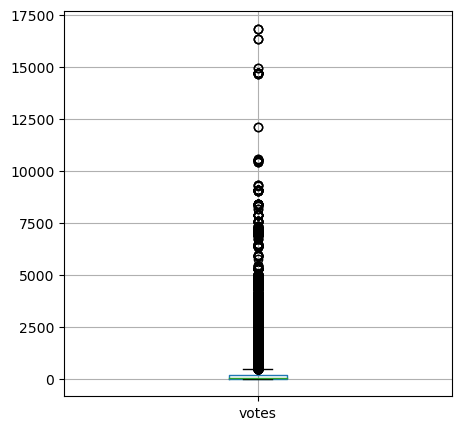

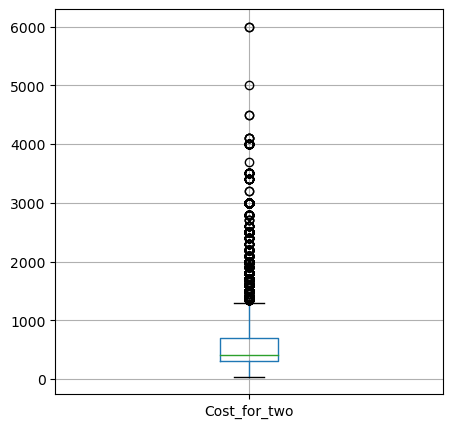

In [54]:
# Setting the plot size

plt.rcParams['figure.figsize'] = (5,5)


# Creating a boxplot for rate column

df_num.boxplot(column=['rate'])
plt.show()


# Creating a boxplot for votes column

df_num.boxplot(column=['votes'])
plt.show()


# Creating a boxplot for Cost_for_two column

df_num.boxplot(column=['Cost_for_two'])
plt.show()

**Observations:**

From the above plot, we notice that for all the variables there are points above the upper extreme and below the lower extreme - these points are outliers.

# Checking the cleaned data

In [55]:
df.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

       rest_type                        cuisines  Cost_for_two  \
0  Casual Dining  North Indian, Mughlai, Chinese         800.0   
1  Casual Dining                          Others         800.0   
2         Others                          Others         800.0   
3    Quick Bites      South Indian, North Indian         300.0   
4  Casual Dining                          Others         600.0   

  Type_of_service          City  
0          Buffet  Banashankari  
1          Buffet  Banashankari  
2          Buffet  Banashankari  
3          Buffet  Banashankari  
4          Buffet  Banashankari

In [56]:
df.dtypes

name                object
online_order        object
book_table          object
rate               float64
votes                int64
location            object
rest_type           object
cuisines            object
Cost_for_two       float64
Type_of_service     object
City                object
dtype: object

# Visualisations

## A. Univariate Analysis

## 1. Count plot of various `Locations`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HSR'),
  Text(3, 0, 'Koramangala 5th Block'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Whitefield'),
  Text(6, 0, 'Indiranagar'),
  Text(7, 0, 'Jayanagar'),
  Text(8, 0, 'Marathahalli'),
  Text(9, 0, 'Bannerghatta Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Electronic City'),
  Text(12, 0, 'Koramangala 1st Block'),
  Text(13, 0, 'Brigade Road'),
  Text(14, 0, 'Koramangala 7th Block'),
  Text(15, 0, 'Koramangala 6th Block'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Koramangala 4th Block'),
  Text(18, 0, 'Ulsoor'),
  Text(19, 0, 'Banashankari'),
  Text(20, 0, 'MG Road'),
  Text(21, 0, 'Kalyan Nagar'),
  Text(22, 0, 'Richmond Road'),
  Text(23, 0, 'Malleshwaram'),
  Text(24, 0, 'Frazer Town'),
  Text(25, 0, 'Basavanagudi'),
  Te

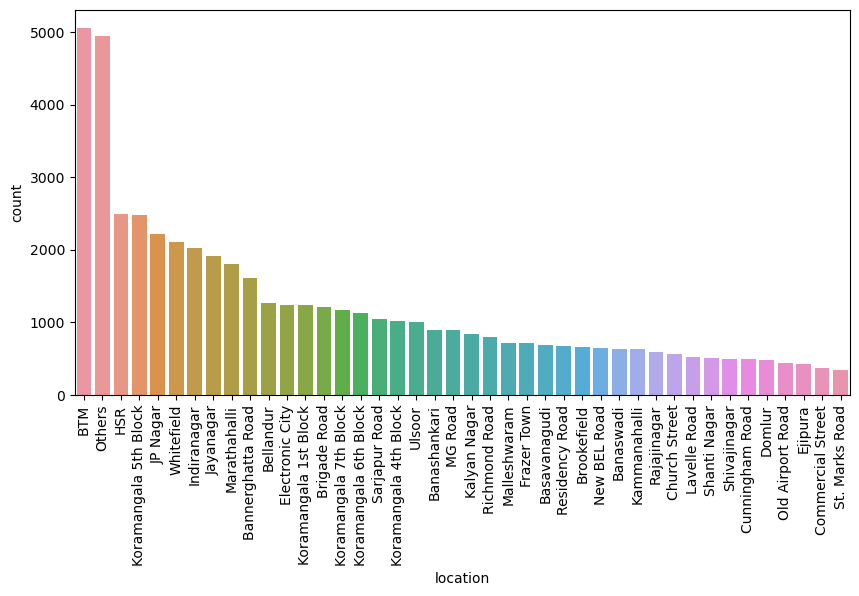

In [57]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df.location, order=df.location.value_counts(ascending = False).index)
plt.xticks(rotation = 90)

**Observations:**

1. Here we can see that the maximum number of restaurants are present in **BTM** location. So after analysing this we understand that in order to open a new restaurant I will have to look for a location other than BTM as it already has a lot of competition. Opening a restaurant in this location might be risker compared to other locations.

2. In order to be safe and enter the market at a location where there is demand but also not much competition we can try opening a new restaurant in the mid range locations.

## 2. Visualizing `online_order`

<AxesSubplot:xlabel='online_order', ylabel='count'>

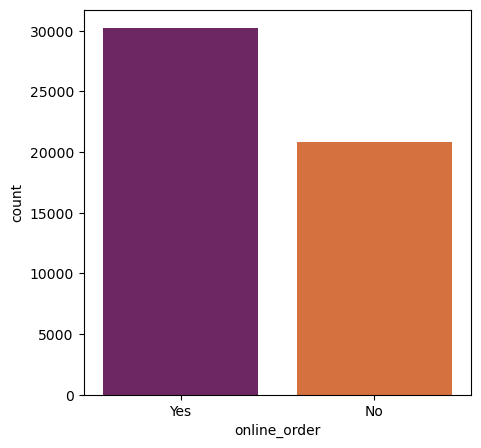

In [58]:
plt.figure(figsize = (5,5))
sns.countplot(df.online_order, palette = 'inferno')

**Observation:**

Here we can see that majority of the restaurants have the option for online ordering.

## 3. Visualizing `book_table`

<AxesSubplot:xlabel='book_table', ylabel='count'>

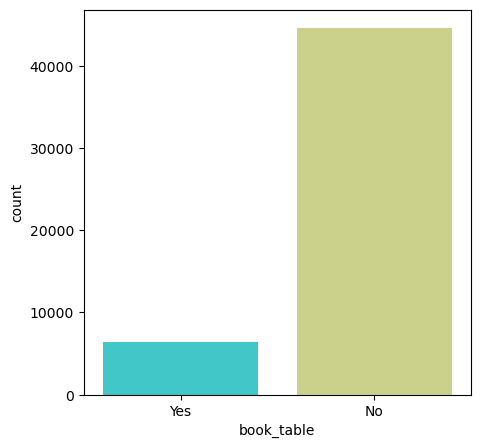

In [59]:
plt.figure(figsize = (5,5))
sns.countplot(df.book_table , palette = 'rainbow')

**Observation:**

Here we can see that majority of the restaurants do not require prior booking of a table.

## 4. Visualizing `cuisines`

In [60]:
values = df['cuisines'].value_counts()[1:6] # starting with 1 to remove other
labels = values.index
text = values.index
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = .5)])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 15)
fig.update_layout(title = "Top 5 popular cuisines of Bangalore ", titlefont={'size': 30})
fig.show()

## 5. Visualizing `rate`

<AxesSubplot:xlabel='rate', ylabel='Density'>

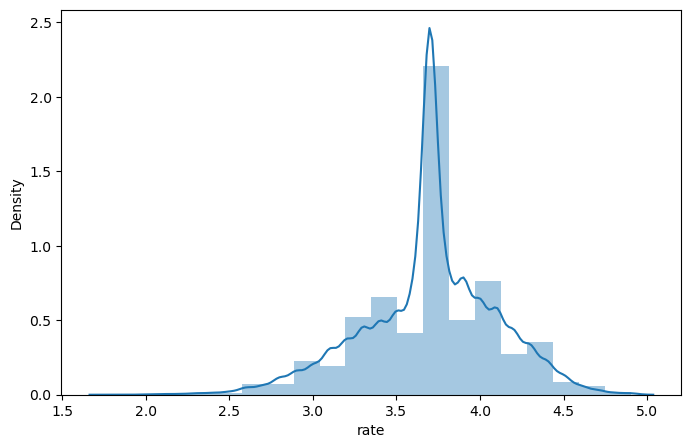

In [61]:
plt.figure(figsize=(8,5))
sns.distplot(df['rate'], bins=20)

**Observation:**

We can see from above that most of the ratings are within 3.5 and 4.0

## 6. Visualizing `Type_of_service`

Text(0.5, 1.0, 'Type of service')

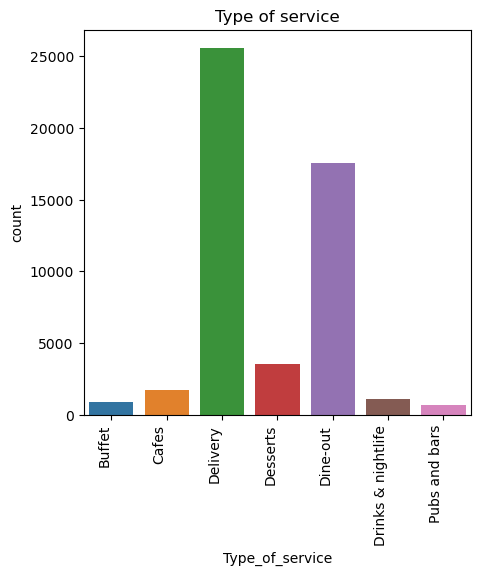

In [62]:
sns.countplot(df['Type_of_service']).set_xticklabels(sns.countplot(df['Type_of_service']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Type of service')

**Observation:**

Here the two main service types are **Delivery** and **Dine-out**.

## 7. Visualizing `Cost_for_two`

In [63]:
trace0=go.Box(y=df['Cost_for_two'],name="accepting online orders",
              marker = dict(
        color = 'rgb(113, 10, 100)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=700,height=700,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Distribution of charges

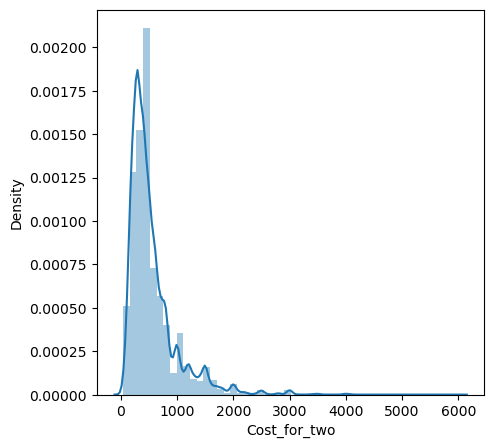

In [64]:
plt.figure(figsize=(5,5))
sns.distplot(df['Cost_for_two'])
plt.show()

## B. Bivariate Analysis

## 5. Visualizing `online_order` v/s `rate`

<AxesSubplot:xlabel='online_order', ylabel='rate'>

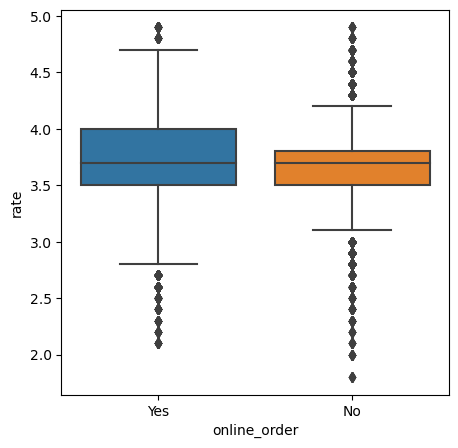

In [65]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

**Observation:**

Here we can see that restaurants having online order facility have below ratings:
   1. Maximum: **4.8**
   2. Average: **3.7**
   3. Minimum: **2.8**

Whereas restaurants which do not have online order facility have below ratings:
   1. Maximum: **4.2**
   2. Average: **3.7**
   3. Minimum: **3.2**
   
Restauraents which are having online_order facility have good ratings.

## 6. Visualizing `book_table` v/s `rate`

<AxesSubplot:xlabel='book_table', ylabel='rate'>

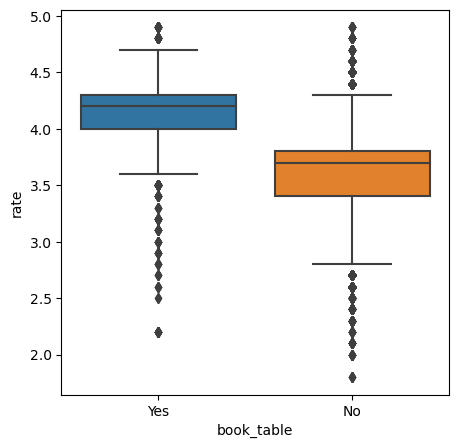

In [66]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

**Observation:**

Here we can see that restaurants having table booking facility have below ratings:
   1. Maximum: **4.8**
   2. Average: **4.3**
   3. Minimum: **3.6**

Whereas restaurants which do not have table booking facility have below ratings:
   1. Maximum: **4.4**
   2. Average: **3.7**
   3. Minimum: **2.7**
   
Restaurents which are having booling a table facility have good ratings.

## 1. Visualizing `Cost_for_two` v/s `votes` v/s `rate` using pair plot

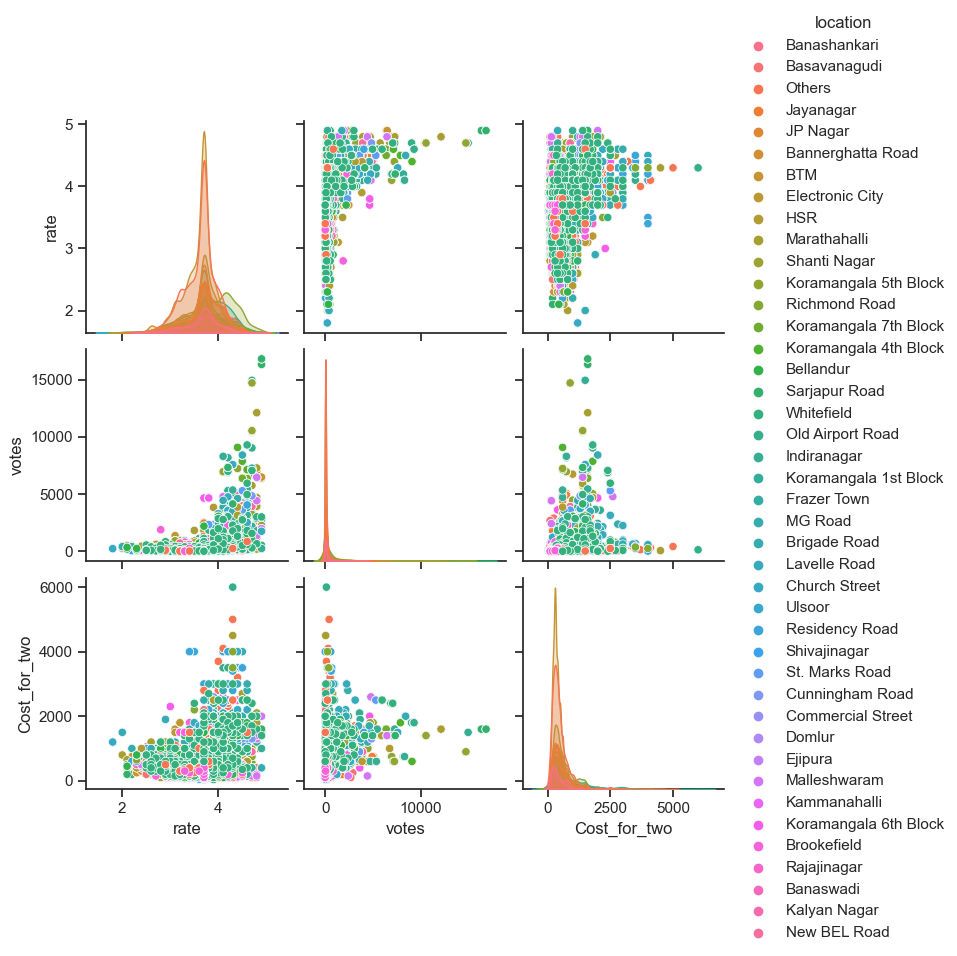

In [67]:
sns.set(style="ticks")
sns.pairplot(df, hue="location", palette="husl")
plt.show()

**Observation:**

The diagonal plots show the distribution of each variable separately, and most of them seem to follow a normal distribution

#### Finding correlation between columns

<AxesSubplot:>

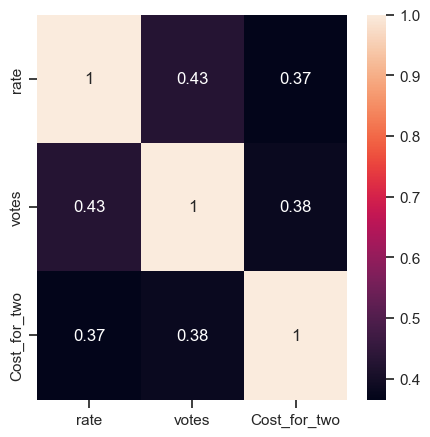

In [68]:
sns.heatmap(df.corr(), annot=True)

**Observation:**

Based on the correlation table, there is no column that stands out as having a very high correlation with any other column, so there is no immediate need to delete any column based on correlation

# Analysis

## 1. How many restaurants have online ordering facility in each location?

In [69]:
df1 = df.groupby(['location', 'online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values = None, index = ['location'], columns = ['online_order'])
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Others                 2064  2890
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119

<AxesSubplot:xlabel='location'>

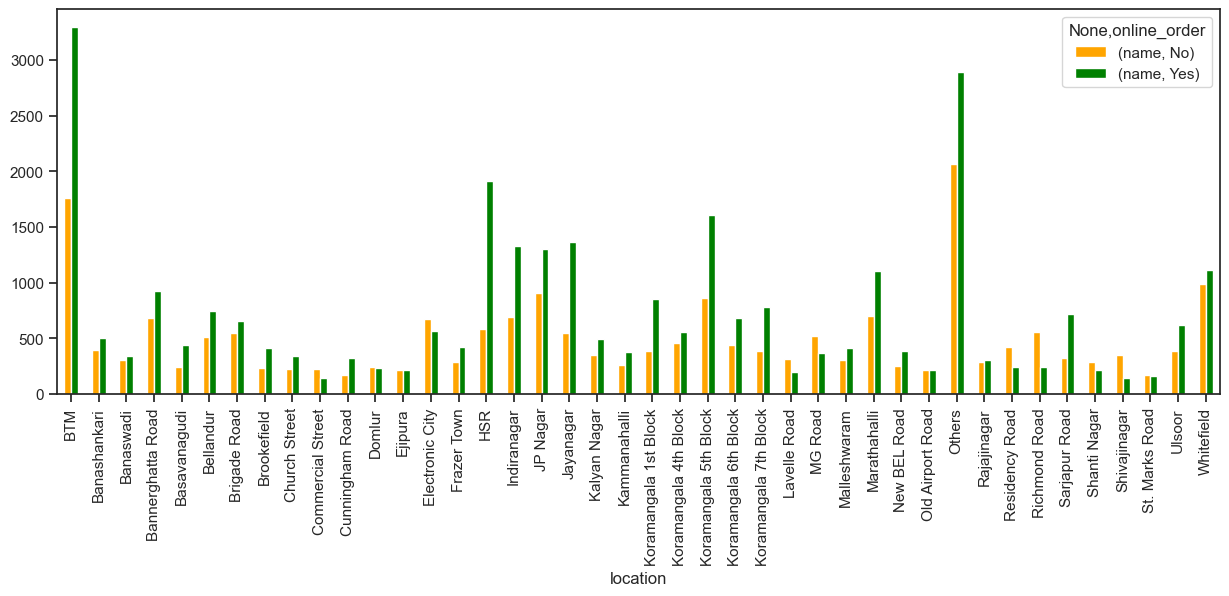

In [70]:
df1.plot(kind='bar', figsize=(15,5), color = ['orange', 'green'])

**Observation:**

1. **Blue line** indicates the restaurants which are **providing online facility**.

2. **Red line** indicates the restaurants which are **not providing online facility**.

#### Calculating percentage of restaurants having online order facility

Yes    30228
No     20814
Name: online_order, dtype: int64


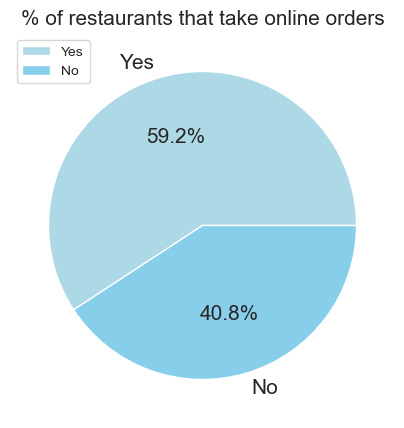

In [71]:
print(df['online_order'].value_counts())
plt.figure(figsize=(5,5))
df['online_order'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=15)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 10})

**Observation:**

It is evident from the above graph that in nearly 59% of restaurants, an online ordering facility is available.

## 2. How many restaurants have table booking facility in each location?

In [72]:
df2 = df.groupby(['location', 'book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values = None, index = ['location'], columns = ['book_table'])
df2

name       
book_table                 No    Yes
location                            
BTM                    4889.0  167.0
Banashankari            839.0   63.0
Banaswadi               632.0    8.0
Bannerghatta Road      1510.0   99.0
Basavanagudi            668.0   16.0
Bellandur              1170.0   98.0
Brigade Road           1034.0  176.0
Brookefield             582.0   74.0
Church Street           385.0  181.0
Commercial Street       370.0    NaN
Cunningham Road         315.0  175.0
Domlur                  427.0   55.0
Ejipura                 433.0    NaN
Electronic City        1148.0   98.0
Frazer Town             706.0    8.0
HSR                    2277.0  217.0
Indiranagar            1578.0  448.0
JP Nagar               1903.0  315.0
Jayanagar              1637.0  279.0
Kalyan Nagar            692.0  149.0
Kammanahalli            590.0   49.0
Koramangala 1st Block  1186.0   50.0
Koramangala 4th Block   695.0  322.0
Koramangala 5th Block  1787.0  692.0
Koramangala 6th Block  1015.0  112.0
Koramangala 7th Block  1012.0  162.0
Lavelle Road            290.0  228.0
MG Road                 546.0  347.0
Malleshwaram            632.0   89.0
Marathahalli           1642.0  163.0
New BEL Road            588.0   56.0
Old Airport Road        378.0   59.0
Others                 4587.0  367.0
Rajajinagar             550.0   41.0
Residency Road          522.0  149.0
Richmond Road           687.0  116.0
Sarjapur Road           893.0  154.0
Shanti Nagar            451.0   57.0
Shivajinagar            475.0   23.0
St. Marks Road          219.0  124.0
Ulsoor                  834.0  177.0
Whitefield             1852.0  253.0

<AxesSubplot:xlabel='location'>

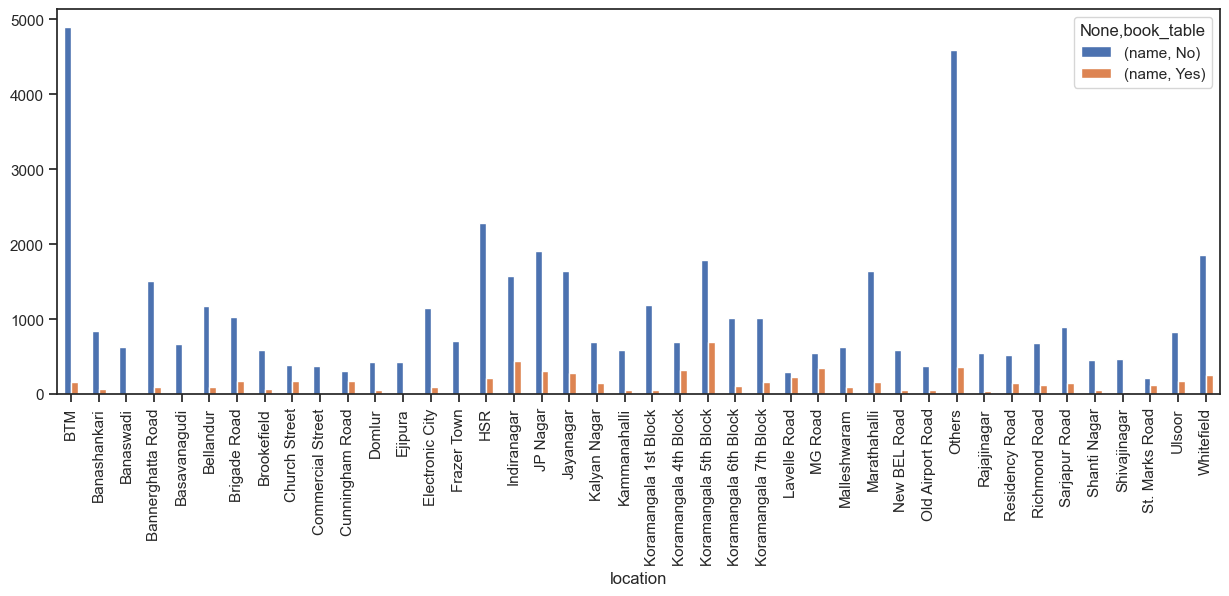

In [73]:
df2.plot(kind='bar', figsize=(15,5))

**Observation:**

1. **Orange line** indicates the restaurants which are **providing table booking facility**.

2. **Blue line** indicates the restaurants which are **not providing table booking facility**.

#### Calculating percentage of restaurants having online order facility

No     44626
Yes     6416
Name: book_table, dtype: int64


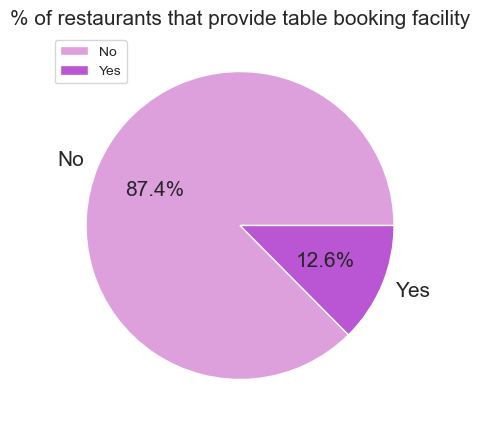

In [74]:
print(df['book_table'].value_counts())
plt.figure(figsize=(5,5))
df['book_table'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=15)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 10})

**Observation:**

It is evident from the above graph that in nearly 59% of restaurants, an online ordering facility is available.

## 3. Grouping different type of restaurants location wise

In [75]:
df3 = df.groupby(['location', 'Type_of_service'])['name'].count()
df3.to_csv('location_type.csv')
df3 = pd.read_csv('location_type.csv')
df3 = pd.pivot_table(df3, values = None, index = ['location'], columns = ['Type_of_service'])
df3

name                                    \
Type_of_service       Buffet  Cafes Delivery Desserts Dine-out   
location                                                         
BTM                     21.0   83.0   3053.0    198.0   1660.0   
Banashankari             7.0   36.0    418.0     71.0    356.0   
Banaswadi                NaN   24.0    310.0     37.0    262.0   
Bannerghatta Road        9.0   46.0    828.0    137.0    578.0   
Basavanagudi             7.0   11.0    344.0     66.0    251.0   
Bellandur               28.0   36.0    617.0     75.0    479.0   
Brigade Road            25.0   46.0    497.0    108.0    455.0   
Brookefield              6.0   17.0    339.0     45.0    245.0   
Church Street           19.0   51.0    193.0     29.0    215.0   
Commercial Street        NaN   13.0    121.0     77.0    159.0   
Cunningham Road         29.0   34.0    194.0     26.0    184.0   
Domlur                  15.0   13.0    261.0     35.0    135.0   
Ejipura                  NaN    NaN    245.0     16.0    172.0   
Electronic City         23.0   24.0    570.0     71.0    516.0   
Frazer Town              1.0   11.0    470.0     56.0    172.0   
HSR                     19.0   49.0   1694.0    120.0    580.0   
Indiranagar             38.0   97.0   1091.0    140.0    529.0   
JP Nagar                45.0   76.0   1151.0    166.0    722.0   
Jayanagar               27.0   77.0   1043.0    182.0    575.0   
Kalyan Nagar             9.0   45.0    366.0     88.0    315.0   
Kammanahalli             2.0   27.0    329.0     35.0    240.0   
Koramangala 1st Block    3.0   26.0    716.0     70.0    398.0   
Koramangala 4th Block   21.0   53.0    464.0     81.0    302.0   
Koramangala 5th Block   65.0  146.0   1075.0    209.0    842.0   
Koramangala 6th Block   18.0   43.0    511.0     70.0    411.0   
Koramangala 7th Block   25.0   52.0    503.0    127.0    417.0   
Lavelle Road            30.0   27.0    127.0     50.0    191.0   
MG Road                 51.0   76.0    266.0     68.0    343.0   
Malleshwaram            11.0   31.0    269.0     85.0    291.0   
Marathahalli            34.0   32.0    980.0    105.0    630.0   
New BEL Road             4.0   29.0    338.0     33.0    224.0   
Old Airport Road        12.0    5.0    200.0     35.0    164.0   
Others                  83.0  133.0   2787.0    276.0   1553.0   
Rajajinagar             10.0    4.0    258.0     55.0    251.0   
Residency Road          20.0   31.0    187.0     63.0    289.0   
Richmond Road           63.0   21.0    257.0     78.0    356.0   
Sarjapur Road           25.0   22.0    558.0     82.0    319.0   
Shanti Nagar             9.0   22.0    198.0     39.0    229.0   
Shivajinagar             6.0   17.0    143.0     37.0    280.0   
St. Marks Road           5.0   10.0    111.0     10.0    145.0   
Ulsoor                  16.0   56.0    456.0     71.0    359.0   
Whitefield              28.0   51.0   1041.0    137.0    768.0   

                                                        
Type_of_service       Drinks & nightlife Pubs and bars  
location                                                
BTM                                 22.0          19.0  
Banashankari                        14.0           NaN  
Banaswadi                            6.0           1.0  
Bannerghatta Road                    9.0           2.0  
Basavanagudi                         5.0           NaN  
Bellandur                           17.0          16.0  
Brigade Road                        57.0          22.0  
Brookefield                          4.0           NaN  
Church Street                       36.0          23.0  
Commercial Street                    NaN           NaN  
Cunningham Road                     16.0           7.0  
Domlur                              12.0          11.0  
Ejipura                              NaN           NaN  
Electronic City                     21.0          21.0  
Frazer Town                          2.0           2.0  
HSR                        

<AxesSubplot:ylabel='location'>

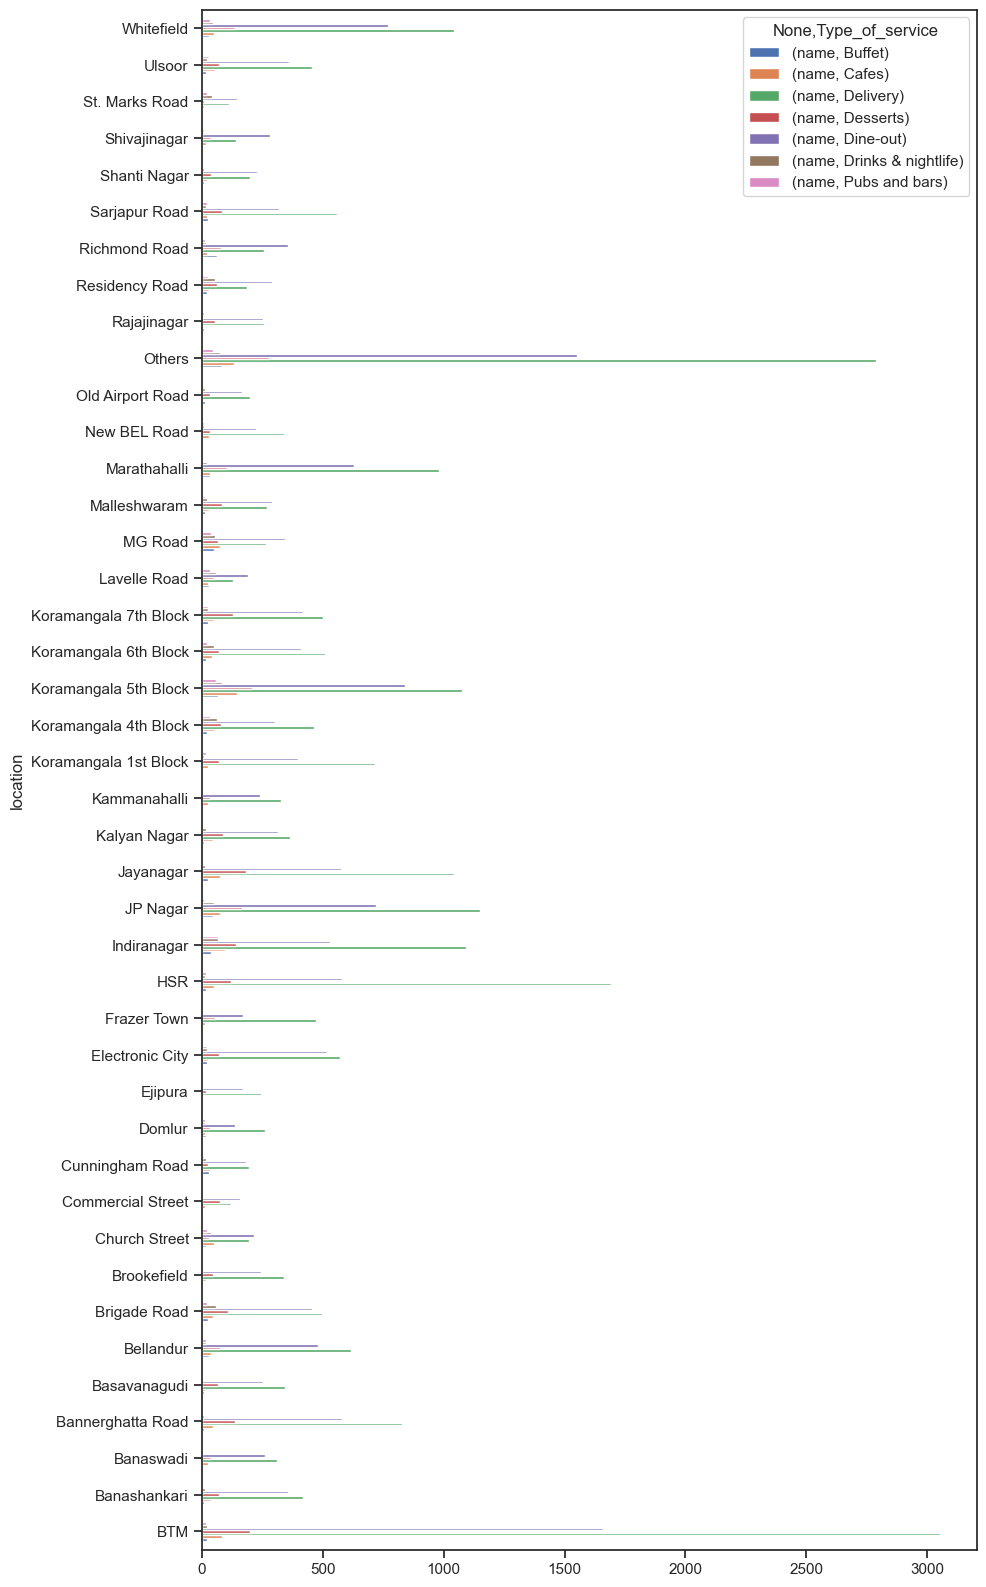

In [76]:
df3.plot(kind='barh', figsize=(10,20))

## 4. Visualizing Types of Service vs Rate

<AxesSubplot:xlabel='Type_of_service', ylabel='rate'>

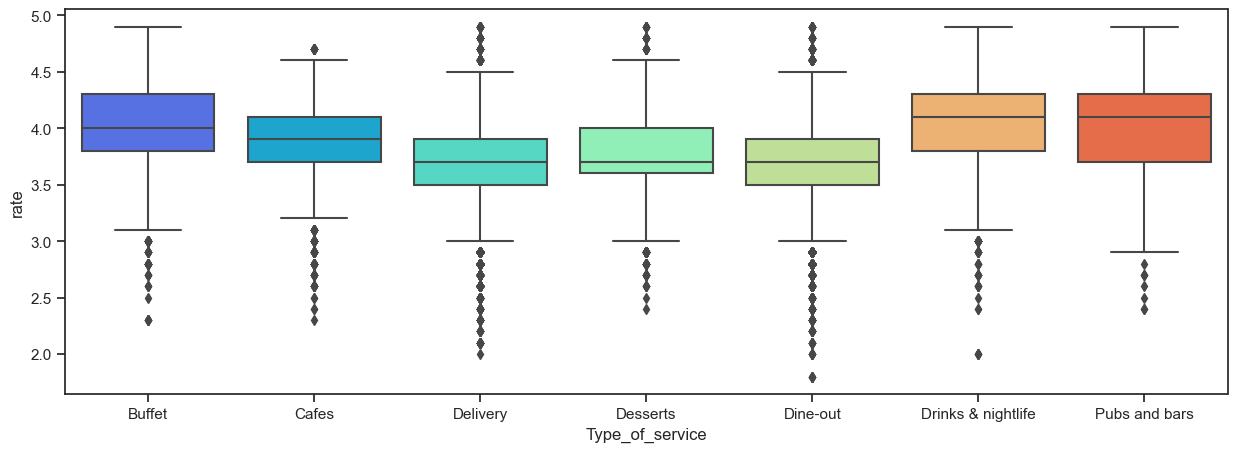

In [77]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Type_of_service', y = 'rate', data = df, palette = "rainbow")

**Observation:**

Restaurants having **'Buffet', 'Drinks & nightlife'** and **'Pubs and bars'** have a higher rating compared to others.

## 5. Finding no. of votes location wise

In [78]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()

df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending = False)
df5.head()

votes
location                      
Koramangala 5th Block  2214083
Indiranagar            1165909
Koramangala 4th Block   685156
Church Street           590306
JP Nagar                586522

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'Others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

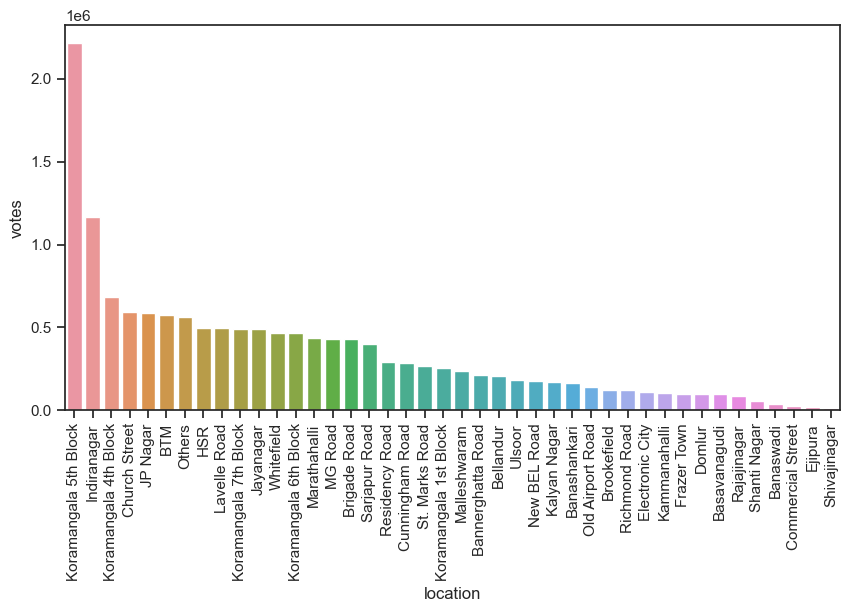

In [79]:
plt.figure(figsize = (10,5))
sns.barplot(df5.index, df5['votes'])
plt.xticks(rotation = 90)

**Observation:**

Restaurants in the location **'Koramangala 5th Block'** have received the maximum no. of votes as compared to others.

## 6. Finding no. of votes cuisines wise

In [80]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()

df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending = False)
df7.head()

votes
cuisines                       
Others                 11542182
North Indian             516310
North Indian, Chinese    258225
South Indian             161975
North Indian, Mughlai    103706

#### Dropping the 'Others' value

In [81]:
df7 = df7.iloc[1:, :]
df7.head()

votes
cuisines                     
North Indian           516310
North Indian, Chinese  258225
South Indian           161975
North Indian, Mughlai  103706
Chinese                101728

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

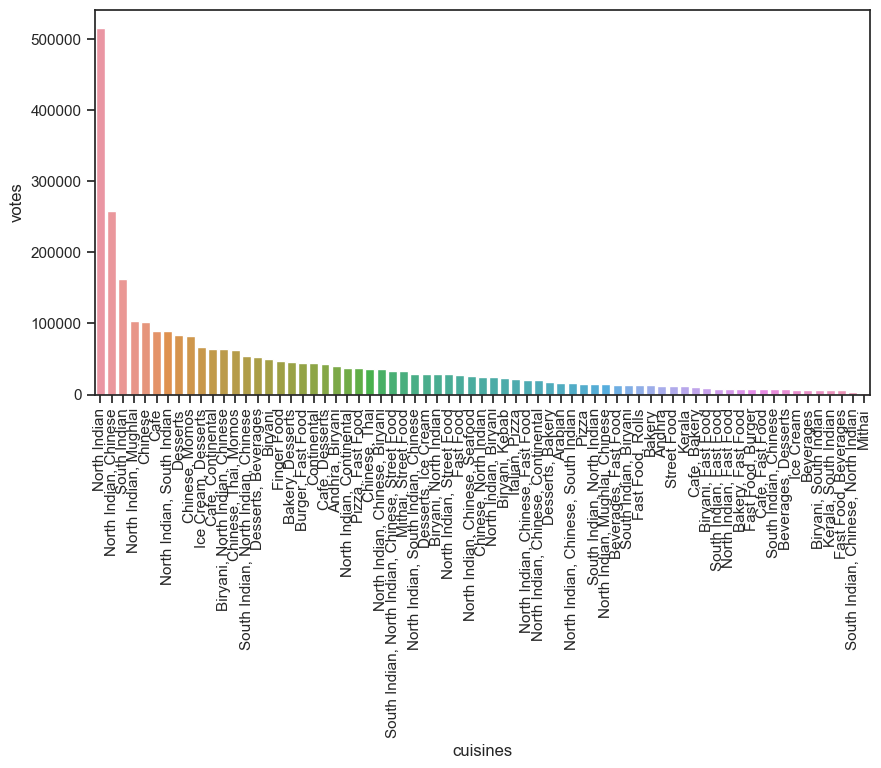

In [82]:
plt.figure(figsize = (10,5))
sns.barplot(df7.index, df7['votes'])
plt.xticks(rotation = 90)

**Observation:**

Restaurants having cuisine **'North Indian'** has received the maximum no. of votes as compared to others.

# Inferences and Conclusion

While analysing the data I came to know that if we want to start a new food business we can see this kind of data then analyse it and see which location is good to start a new restaurent or any other small food business. This will help in furture business persons to start their business. This also shows which restaurant is good and has good ratings.


This dataset can be used for solving below problem staements:

1. **Restaurant Recommendation:** You can build a recommendation system to suggestrestaurants to users based on their preferences, such as cuisine type, location,average cost, and ratings.

2. **Rating Prediction:** You can develop a model to predict the ratings of restaurants based on their features. This can be approached as a regression problem.

3. **Sentiment Analysis:** You can perform sentiment analysis on the user reviews tounderstand the sentiments associated with different restaurants and identify positive ornegative trends.